In [9]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
%matplotlib inline

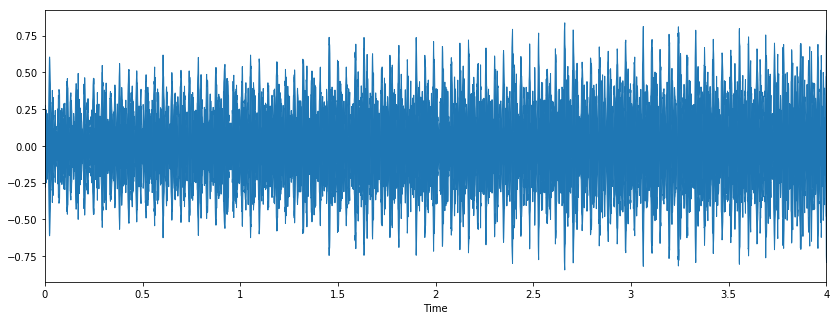

In [32]:
#check a sound
plt.figure(figsize=(14,5))
lib_data,sample_rate=librosa.load("dog.wav")
librosa.display.waveplot(lib_data,sample_rate)
ipd.Audio("dog.wav")


we can use scipy but we will use librosa because there may be different sample rate for differen part of music using librosa we can notmalize this

In [8]:
data

array([ 0.08480852,  0.12655827,  0.12054478, ..., -0.71314174,
       -0.6833932 , -0.72338766], dtype=float32)

plotting ths data it will create file so we can show audio file in data point

In [20]:
data=pd.read_csv(r"UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [21]:
data["class"].value_counts()

street_music        1000
drilling            1000
dog_bark            1000
jackhammer          1000
engine_idling       1000
air_conditioner     1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Data Processing

In [24]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read("dog.wav")

In [26]:
wave_audio

array([[  2549,   5047],
       [  2965,   4563],
       [  3598,   4089],
       ...,
       [-21413, -23990],
       [-21470, -23542],
       [-21440, -23269]], dtype=int16)

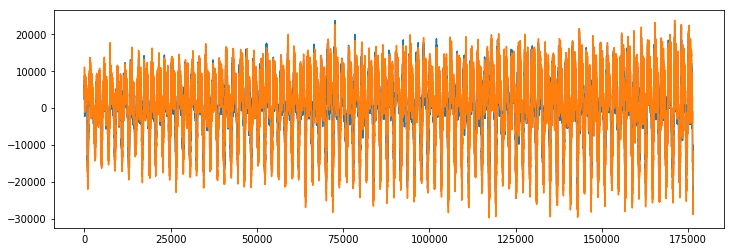

In [29]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

# Extract Features

In [35]:
mfccs=librosa.feature.mfcc(y=lib_data,sr=sample_rate,n_mfcc=40)
mfccs.shape

(40, 173)

In [38]:
import os

In [47]:
#extracting feature for all files
data_path="..//data_given//UrbanSound8K//audio//"


In [49]:
def feature_extractor(file):
    audio,sample_rate=librosa.load(file,res_type="kaiser_fast")
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_features=np.mean(mfccs_features.T,axis=0)
    return mfccs_features

In [43]:
import numpy as np
from tqdm import tqdm

In [52]:
extracted_features=[]
for index_num,row in tqdm(data.iterrows()):
    file_name=os.path.join(os.path.abspath(data_path),'fold'+str(row['fold'])+'//',str(row['slice_file_name']))
    final_class_label=row["class"]
    data_ex=feature_extractor(file_name)
    extracted_features.append([data_ex,final_class_label])

3554it [03:07, 17.26it/s]/home/lab-a-27/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8323it [07:13, 25.98it/s]/home/lab-a-27/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8327it [07:13, 29.41it/s]/home/lab-a-27/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [07:32, 19.31it/s]


In [55]:
extracted_features_df=pd.DataFrame(extracted_features,columns=["features","class"])
extracted_features_df.head(10)

,features,class
0,"[-215.793, 71.66612, -131.81377, -52.09133, -2...",dog_bark
1,"[-424.68686, 110.562294, -54.14824, 62.01074, ...",children_playing
2,"[-459.56473, 122.80033, -47.924713, 53.265697,...",children_playing
3,"[-414.55374, 102.89688, -36.664955, 54.180405,...",children_playing
4,"[-447.39703, 115.0954, -53.809113, 61.608585, ...",children_playing
5,"[-447.70856, 118.40948, -35.248653, 56.739902,...",children_playing
6,"[-477.19727, 120.6377, -29.6925, 57.05192, 1.1...",children_playing
7,"[-464.84628, 117.714554, -30.163273, 50.72254,...",children_playing
8,"[-472.1214, 126.76598, -38.366528, 58.748646, ...",children_playing
9,"[-196.18529, 114.94507, -14.661183, 1.2298629,...",car_horn


In [56]:
X=np.array(extracted_features_df["features"].tolist())
y=np.array(extracted_features_df["class"].tolist())

In [57]:
X

array([[-2.15792999e+02,  7.16661224e+01, -1.31813766e+02, ...,
        -1.68275869e+00, -8.85857761e-01,  3.54387492e-01],
       [-4.24686859e+02,  1.10562294e+02, -5.41482391e+01, ...,
         6.17408812e-01, -6.84973836e-01,  5.71513355e-01],
       [-4.59564728e+02,  1.22800331e+02, -4.79247131e+01, ...,
         2.22541380e+00,  1.54661810e+00, -8.36317122e-01],
       ...,
       [-3.04613190e+02,  1.12619942e+02, -4.71619453e+01, ...,
        -3.03358150e+00,  2.71057367e+00,  7.67189360e+00],
       [-3.44714203e+02,  1.26758156e+02, -5.61771660e+01, ...,
        -7.80225992e+00, -1.77907336e+00,  5.83541679e+00],
       [-3.15933807e+02,  9.56758957e+01, -3.80477753e+01, ...,
         5.77580452e-01, -1.14637651e+01, -5.96535349e+00]], dtype=float32)

In [58]:
y=(pd.get_dummies(y))

In [59]:
y

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Model Creation

In [62]:
import tensorflow as tf

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [65]:
num_labels=y.shape[1]


In [66]:
model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(200,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [69]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')


In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
num_batch_size=32
start=datetime.now()
checkpointer=ModelCheckpoint(filepath='..//saved_models//audio_classification.hdf5',verbose=1,save_best_only=True)
model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs)
duration=datetime.now()-start
print("Training completed in",duration)

Epoch 1/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9710 - accuracy: 0.6796
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9668 - accuracy: 0.6790
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9688 - accuracy: 0.6719
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9542 - accuracy: 0.6726
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9772 - accuracy: 0.6746
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9455 - accuracy: 0.6790
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9430 - accuracy: 0.6783
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9477 - accuracy: 0.6815
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9385 - accuracy: 0.6826
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9333 - accura

219/219 [==============================] - 0s 2ms/step - loss: 0.8583 - accuracy: 0.7154
Epoch 82/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8732 - accuracy: 0.7111
Epoch 83/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8623 - accuracy: 0.7122
Epoch 84/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8464 - accuracy: 0.7101
Epoch 85/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8649 - accuracy: 0.7082
Epoch 86/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8733 - accuracy: 0.7059
Epoch 87/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8653 - accuracy: 0.7089
Epoch 88/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8614 - accuracy: 0.7147
Epoch 89/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8757 - accuracy: 0.7105
Epoch 90/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8584 - accuracy: 

In [73]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7945048809051514


In [87]:
prediction_featuree=feature_extractor("dog.wav")

In [93]:
prediction_featuree=prediction_featuree.reshape(1,-1)

In [94]:
model.predict_classes(prediction_featuree)

array([5])